# ***$Dinámica$ $de$ $lanzamiento$ $de$ $Proyectiles$***
### ***Movimiento parabólico con resistencia del aire y gravedad variable***



### ***Generalidades***
La dinámica de un proyectil propulsado en un entorno con condiciones naturales está gobernadoa por diversos parámetros que pueden cambiar por completo su comportamiento, por lo cual, tener un control y análisis preciso de su carácter es fundamental para poder manipular a voluntad su naturaleza.

El propósito del proyecto es el siguiente; dadas unas coordenadas geográficas en forma de latitud y longitud, calcular la ***cantidad mínima de combustible*** para que un proyectil con características preestablecidas pueda llegar a su objetivo en ***el menor tiempo posible***, optimizando así su comportamiento bajo condiciones ambientales conocidas.

Note entonces que el enfoque de la solución se construirá alrededor de las ecuaciones de Newton. Sin embargo, dado que es un proyectil propulsado, su masa varía a través del tiempo por la transformación del combustible en forma de fuerza propulsora, se empleará la segunda ley de Newton en su forma diferencial, esto es:


$$
\Sigma F = \frac{dP}{dt}
$$

Siendo así, desarrollemos entonces las generalidades del análisis.

Las condiciones ambientales proporcionadas para el proyectil constan de una gravedad variable dependiente de la distania al centro de la Tierra, y una altura tanto inicial como final al nivel del mar, así como una fuerza de arrastre dada por aire de densidad 1.225 $kg/m^3$, a una temperatura estándar de 15 °C, que genera una fuerza  de arrastre, que varía con la velocidad del proyectil. Para simplificar los cálculos asociados a la geometría del objeto y su interacción con las fuerzas, se asume un proyectil perfectamente esférico de radio $r$ y masa $m_b$. Luego, previo a su lanzamiento, el proyectil contará con una masa $m_c$ extra asociada al combustible, la cual se irá reduciendo en un factor lineal $\dot{m}$.  Finalmente, una vez comience su ignición, el proyectil contará con una propulsión (*Thrust* ), que se define como la fuerza generada por la expulsión de masa a grandes velocidades. Dado el carácter constante de $\dot{m}$, $T$ consecuentemente es constante. (Dado nuestros rangos de alcance, no hay variaciones atmosféricas significativas que puedan influir sobre $T$ ).

Con todo esto mencionado, podemos entonces definir las ecuaciones que gobierna nuestro sistema en un análisis bidimensional de su posición, provienen de las ecuaciones de cohetes de Tsiolkovski:


$$
X: Tcos\theta  - \frac{1}{2}A C_d \rho v_x^2 = (m_b + m_c -\dot{m}t)a_x - \dot{m}v_x
$$

$$
Y: Tsen\theta -(m_b+ m_c-\dot{m}t)g - \frac{1}{2}A C_d \rho v_y =(m_b + m_c -\dot{m}t)a_y - \dot{m}v_y
$$


- T: Thrust
-g: Gravedad
- $\theta$ : Ángulo de lanzamiento
-$m_b$: Masa del proyectil
-$m_c$: Masa del combustible
-A: Área superficial
- $C_d$: Coeficiente de arrastre
-$\dot{m}$: Tasa de pérdida de combustible

La dirección de la fuerza de arrastre será contraria al movimiento en ese instante de tiempo.


Finalizando así las generalidades, se describirá entonces el proceso computacional con el cual se realizaron los cálculos asociados.
Dado la naturaleza del movimiento (parabólico) para simplificar los signos asociados a las direcciones las fuerzas y los desplazamientos, la dinámica del proyectil se separa en 3 etapas;

***Etapa 1***: Ignición y propulsión. Finaliza cuando el combustible se agota.

***Etapa 2***: Movimiento asociado por la inercia de la propulsión. los desplazamientos y fuerzas siguen en la misma dirección de la Etapa 1 sin embargo en este momento ya no existen las fuerzas de propulsión y la masa es constante.  Finaliza cuando llega a su altura máxima ($v_y$=0).

***Etapa 3***: Descenso.  La fuerza de arrastre al igual que la velocidad y el desplazamiento cambian de dirección. El proyectil solo queda a merced de la gravedad.  Finaliza cuando su posición vuelve al suelo ($y$=0).

Note que las condiciones como la masa del proyectil o la geometría de la esfera son constantes proporcionadas. Por lo cual, el alcance dependen de la velocidad de expulsión del proyectil ($T$), por ello, dada una coordenada que proporciona una distancia (objetivo), teniendo una estimación $T$ inicial, se realizará métodos de raíces para obtener los valores más óptimos para llegar al alcance solicitado.


## ***$ETAPA$ $1$***
Despejando las respectivas aceleraciones se llega a la siguietene expresión, que se usará para aplicar método de Runge-Kutta para resolver ecuaciones diferenciales.

$$
 a_x=\frac{Tcos\theta  - \frac{1}{2}A C_d \rho v_x^2 +  \dot{m}v_x}{ (m_b + m_c - \dot{m}t)}
$$



$$
 a_y=\frac{Tsen\theta -(m_b+ m_c-\dot{m}t)g - \frac{1}{2}A C_d \rho v_y^2  + \dot{m}v_y}{(m_b + m_c -\dot{m}t)}
$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from geopy.distance import geodesic

In [ ]:
                            #Hay que ponerle este par de constantes para que se pueda ejecutar, en el código final la masa y el radio serán parámetros
G=6.674e-11
Mt=5.972e24                       #Masa de la tierra
Rt=6371e3                         #Radio promedio de la Tierra
ve=4500                           #Velocidad de expulsión
rho=1.225                         #15°c estandar
g=9.81                            #un valor cualquiera de gravedad, para que la función no salte error
Cd=0.48                           #Coeficiente de arrastre de una esfera rugosa
Mb=40
Mc=30                             #Masa arbitraria para la esfera
r=1

 #Unidades de metros, Kilogramos y segundos

A=np.pi*r**2
def etapa1(Mb,Mc,h=0.01):      #Todas las constantes son positivas, los signos se consideran en la ecuación
  """
  Calcula las posiciones y velocidades en el eje vertical y horizontal
  Va desde el despegue hasta que el proyectil se queda sin combustible

  Recibe
  Mb: Masa independiente (Kg)
  Mc: Masa del combustible (Kg)
  h: step, por defecto es 0.01

  Entrega
  t: Array de tiempo, va desde 0 hasta t=Mc/dm, cuando se acaba el combustible
  x: Array de posición en x
  vx: Array de velocidad en x
  y: Array de posición en y
  vy: Array de velocidad en x
  """

  g0=(G*Mt)/((Rt)**2)          #Gravedad inicial (desde el suelo, al nivel del mar)
  dm= ((Mb+Mc)*g0) / (ve*np.sin(np.pi/6)) #dm representa la tasa de perdida de masa
  #este valor es el  mínimo de dm para que despegue el proyectil (proporcionalidad)
  tf=Mc/dm                               #El tiempo final es conocido, calculado de esta manera.
  t0=0
  t=np.arange(0,tf,h)
  P=ve*dm # y esto es el T (Thrust)
  theta=np.pi/6

  XY0=np.zeros(4) #condiciones iniciales (x,vx,y,vy) las cuales son todas... 0!

  def ax(t,x,vx):
    return ( (P*np.cos(theta)) - ((1/2)*Cd*A*rho*(vx**2)) + (dm*vx) ) / (Mb+Mc-dm*t)               #Ecuaciones diferenciales, despejando la aceleración de ΣF=dP/dt
  def ay(t,y,vy):
    return ( (P*np.sin(theta)) - (Mb+Mc-dm*t)*(g) - (1/2)*Cd*A*rho*(vy**2) + dm*vy ) / (Mb+Mc-dm*t)  #m(t)=Mb+Mc -dm*t, porque establecimos la relación lineal de la masa y el tiempo, con una tasa dm constante


  def matriz(t,XY):
    dXY=np.zeros_like(XY)
    dXY[0]=XY[1]
    dXY[1]=ax(t,XY[0],XY[1])
    dXY[2]=XY[3]
    dXY[3]=ay(t,XY[2],XY[3])
    return dXY
                                             #Realizamos runge-kutta por definición para poder ir actualizando la gravedad
  n = int((tf - t0) / h)                     # número de pasos
  tn = np.zeros(n + 1, dtype=float)          # vector de tiempo
  m = len(XY0)
  XY = np.zeros((m, n + 1), dtype=float)

  tn[0]    = t0                              # tiempo inicial
  XY[:, 0] = XY0                              # condición inicial y(t₀)

  for k in range(n):       #procedemos a realizar RK4

    t_k = tn[k]                            # t en la iteración anterior
    xy_k = XY[:, k]                         # vector en la iteración anterior
    g=(G*Mt)/((Rt+xy_k[3])**2)          #Actualización de la gravedad

    k1 = h * matriz(t_k,           xy_k)                    #Estimadores
    k2 = h * matriz(t_k + h/2,     xy_k + k1/2)
    k3 = h * matriz(t_k + h/2,     xy_k + k2/2)
    k4 = h * matriz(t_k + h,       xy_k + k3)


    XY[:, k + 1] = xy_k + (k1 + 2*k2 + 2*k3 + k4) / 6       #Vector siguiente
    tn[k + 1]   = t_k + h                                   #Actualizar el tiempo


  x=XY[0][:] #Finalmente, se guardan los valores en los arrays para luego ser returneados
  vx=XY[1][:]
  y=XY[2][:]
  vy=XY[3][:]
  t=tn

  return t,x,vx,y,vy



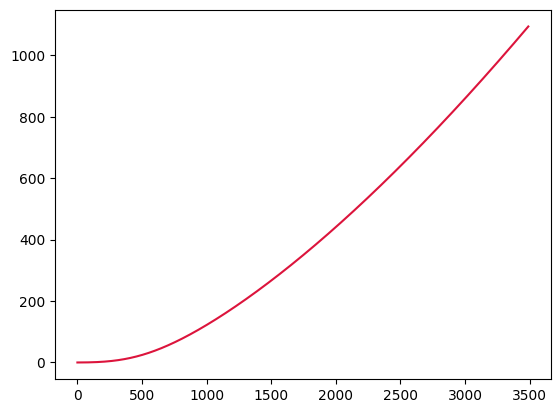

In [ ]:
t1,x1,vx1,y1,vy1=etapa1(40,30)
plt.plot(x1,y1,c='crimson')

## ***$ETAPA$ $2$***


$$
 a_x=-\frac{ \frac{1}{2}A C_d \rho v_x^2 }{ m_b}
$$

$$
 a_y=-\frac{ m_bg + \frac{1}{2}A C_d \rho v_y^2  }{m_b }
$$

Ya no hay thrust ni pérdida de masa, la masa siempre es $m_b$

In [ ]:
def ay2(t,y,vy1): #aceleración en y
    return ((-1/2)*Cd*A*rho*vy1**2 - Mb*(g))/Mb
def ax2(t,x0,vx1):  #aceleración en x
  return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)


def etapa_2(ax2,ay2, t0,x0, y0,vx0, vy0, h=0.01):
    """
    Calcula las posiciones y velocidades en el eje vertical y horizontal
    Va desde el que el combustible se acaba hasta que llega a la altura máxima

    Recibe
    ax2: función de la aceleración en x
    ay2: función de la aceleración en y
    t0: tiempo inicial (debería ser el tiempo final de la etapa 1)
    x0: posición inicial en x (debería ser la posición final de la etapa 1)
    vx0: velocidad inicial en x (debería ser la velocidad final de la etapa 1)
    y0: posición inicial en y (debería ser la posición final de la etapa 1)
    vy0: velocidad inicial en y (debería ser la velocidad final de la etapa 1)

    Entrega
    t: Array de tiempo, va desde 0 hasta t=Mc/dm, cuando se acaba el combustible
    x: Array de posición en x
    vx: Array de velocidad en x
    y: Array de posición en y
    vy: Array de velocidad en x
    """

    t =[t0]   #Condiciones iniciales (Requerimos listas, pues no conocemos tf como para realizar un arreglo)
    x=[x0]
    vx=[vx0]
    y = [y0]
    vy = [vy0]


    t_k=0
    i=0


    while True: #Y lo hacemos indefinidamente hasta alcanzar nuestro condicional que vy=0

      y_k=y[i]
      x_k=x[i]
      vx_k=vx[i]
      vy_k=vy[i]

      def ax2variables(t,vx):
        return ax2(t,x_k,vx)

      def f1(t,x):
        return vx_k

      def ay2variables(t,vy):
        return ay2(t,y_k,vy)

      def f2(t,y):
        return vy_k


      g=(G*Mt)/((Rt+y_k)**2)
      #Runge-Kutta, mas no vectorial, sino con listas, dado que el tiempo final es desconocido

      k1x = h * f1(t_k,           x_k)                          #Estimadores para x
      k2x = h * f1(t_k + h/2,     x_k + k1x/2)
      k3x = h * f1(t_k + h/2,     x_k + k2x/2)
      k4x = h * f1(t_k + h,       x_k + k3x)

      k1vx = h * ax2variables(t_k,           vx_k)              #Estimadores para vx
      k2vx = h * ax2variables(t_k + h/2,     vx_k + k1vx/2)
      k3vx = h * ax2variables(t_k + h/2,     vx_k + k2vx/2)
      k4vx = h * ax2variables(t_k + h,       vx_k + k3vx)


      k1y = h * f2(t_k,           y_k)                            #Estimadores para y
      k2y = h * f2(t_k + h/2,     y_k + k1y/2)
      k3y = h * f2(t_k + h/2,     y_k + k2y/2)
      k4y = h * f2(t_k + h,       y_k + k3y)

      k1vy = h * ay2variables(t_k,           vy_k)                 #Estimadores para vy
      k2vy = h * ay2variables(t_k + h/2,     vy_k + k1vy/2)
      k3vy = h * ay2variables(t_k + h/2,     vy_k + k2vy/2)
      k4vy = h * ay2variables(t_k + h,       vy_k + k3vy)

      valor=((vy_k + (k1vy + 2*k2vy + 2*k3vy + k4vy)) / 6)

      vx.append(vx_k + (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6)  #Se añade la iteración de Runge-Kutta
      x.append(x_k + (k1x + 2*k2x + 2*k3x + k4x) / 6)
      vy.append(vy_k + (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6)
      y.append(y_k + (k1y + 2*k2y + 2*k3y + k4y) / 6)



      i+=1 # se actualza la iteración
      t_k+=h #el t
      t.append(t_k) # se añade

      if valor<1e-3:  #La condición es para cuando la velocidad en y sea cercana a 0, o sea la altura máxima
        break
    t=np.array(t)+t0
    x=np.array(x)
    vx=np.array(vx)
    y=np.array(y)
    vy=np.array(vy)


    return t,x, y,vx, vy

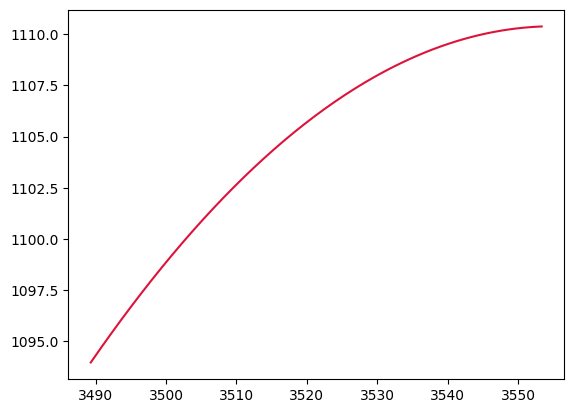

In [ ]:
t1,x1,vx1,y1,vy1=etapa1(Mb=40,Mc=30)  #Que las posiciones iniciales sean las finales de la etapa anterior
t02,x02,y02,vx02,vy02=t1[-1],x1[-1],y1[-1],vx1[-1],vy1[-1]
t2,x2,y2,vx2,vy2=etapa_2(ax2,ay2,t02,x02,y02,vx02,vy02)
plt.plot(x2,y2,c='crimson')

## ***$ETAPA$ $3$***


$$
 a_x=-\frac{ \frac{1}{2}A C_d \rho v_x^2 }{ m_b}
$$

$$
 a_y=\frac{ -m_bg + \frac{1}{2}A C_d \rho v_y^2  }{m_b }
$$

La única diferencia con la etapa 2 es que, como está cayendo, la fuerza de arrastre va en dirección contraria al peso

In [ ]:
def ay3(t,y,vy1): #aceleración en y
    return ((1/2)*Cd*A*rho*vy1**2 - Mb*g)/Mb
def ax3(t,x0,vx1):  #aceleración en x
  return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

def etapa_3(ax,ay, t0,x0, y0,vx0, vy0, h=0.01): #El calculo como el codigo son analogos exactos de la ETAPA 2
    """
    Calcula las posiciones y velocidades en el eje vertical y horizontal
    Va desde la altura máxima hasta la colisión con el suelo

    Recibe
    ax2: función de la aceleración en x
    ay2: función de la aceleración en y
    t0: tiempo inicial (debería ser el tiempo final de la etapa 2)
    x0: posición inicial en x (debería ser la posición final de la etapa 2)
    vx0: velocidad inicial en x (debería ser la velocidad final de la etapa 2)
    y0: posición inicial en y (debería ser la posición final de la etapa 2)
    vy0: velocidad inicial en y (debería ser la velocidad final de la etapa 2)

    Entrega
    t: Array de tiempo, va desde 0 hasta t=Mc/dm, cuando se acaba el combustible
    x: Array de posición en x
    vx: Array de velocidad en x
    y: Array de posición en y
    vy: Array de velocidad en x
    """
#Los unicos cambios percebitles son en las aceleraciones ay3, donde cambian signos asociados a direcciones de las fuerzas

    t =[t0]
    x=[x0]
    vx=[vx0]
    y = [y0]
    vy = [vy0]


    t_k=t0
    i=0


    while True:
      y_k=y[i]
      x_k=x[i]
      vx_k=vx[i]
      vy_k=vy[i]              #Por lo cual el comportamiento del codigo es análogo a la Etapa 2
      g=(G*Mt)/((Rt+y_k)**2)

      def ax2variables(t,vx):
        return ax(t,x_k,vx)

      def f1(t,x):
        return vx_k

      def ay2variables(t,vy):
        return ay(t,y_k,vy)

      def f2(t,y):
        return vy_k



      # calculo de los cuatro estimadores
      k1x = h * f1(t_k,           x_k)                          #Estimadores para x
      k2x = h * f1(t_k + h/2,     x_k + k1x/2)
      k3x = h * f1(t_k + h/2,     x_k + k2x/2)
      k4x = h * f1(t_k + h,       x_k + k3x)

      k1vx = h * ax2variables(t_k,           vx_k)              #Estimadores para vx
      k2vx = h * ax2variables(t_k + h/2,     vx_k + k1vx/2)
      k3vx = h * ax2variables(t_k + h/2,     vx_k + k2vx/2)
      k4vx = h * ax2variables(t_k + h,       vx_k + k3vx)


      k1y = h * f2(t_k,           y_k)                          #Estimadores para y
      k2y = h * f2(t_k + h/2,     y_k + k1y/2)
      k3y = h * f2(t_k + h/2,     y_k + k2y/2)
      k4y = h * f2(t_k + h,       y_k + k3y)

      k1vy = h * ay2variables(t_k,           vy_k)               #Estimadores para vy
      k2vy = h * ay2variables(t_k + h/2,     vy_k + k1vy/2)
      k3vy = h * ay2variables(t_k + h/2,     vy_k + k2vy/2)
      k4vy = h * ay2variables(t_k + h,       vy_k + k3vy)

      valor=(y_k + (k1y + 2*k2y + 2*k3y + k4y)) / 6 #(Valor ya no es velocidad, sino posición! pues...)

      vx.append(vx_k + (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6)
      x.append(x_k + (k1x + 2*k2x + 2*k3x + k4x) / 6)

      vy.append(vy_k + (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6)
      y.append(y_k + (k1y + 2*k2y + 2*k3y + k4y) / 6)

      t.append(t_k)

      i+=1
      t_k+=h
                      #se rompera el ciclo cuando la posición (altura) sea 0!
      if valor<1e-3:
        break

    t=np.array(t)+t0
    x=np.array(x)
    vx=np.array(vx)
    y=np.array(y)
    vy=np.array(vy)

    return t,x, y,vx, vy

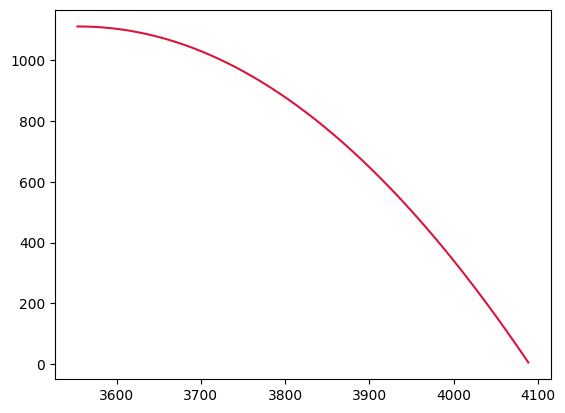

In [ ]:
t03,x03,y03,vx03,vy03=t2[-1],x2[-1],y2[-1],vx2[-1],vy2[-1]
t3,x3,y3,vx3,vy3=etapa_3(ax3,ay3,t03,x03,y03,vx03,vy03)
plt.plot(x3,y3,c='crimson')

## ***$Concatenación$ $Final$***

La distancia recorrida fue 3657.27 metros
La altura máxima fue 1106.24 metros sobre el nivel del mar
El tiempo que tardó fue 254.44 segundos 


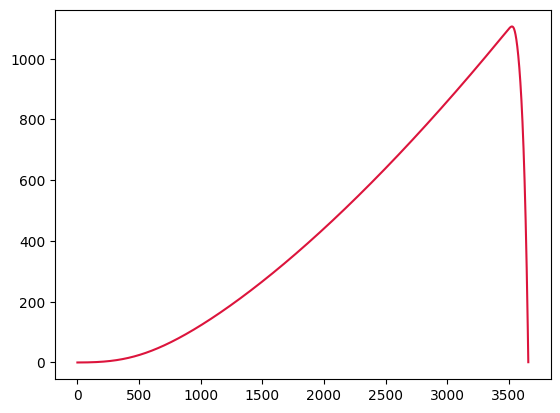

In [ ]:
Mc=30
Mb=40

def ay_etapa2(t,y,vy1):
  return ((-1/2)*Cd*A*rho*vy1**2 - Mb*(g))/Mb  #Ecuaciones de movimiento etapa 2
def ax_etapa2(t,x0,vx1):
  return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

def ay_etapa3(t,y,vy1):
    return ((1/2)*Cd*A*rho*vy1**2 - Mb*(g))/Mb  #Ecuaciones de movimiento etapa 3
def ax_etapa3(t,x0,vx1):                       #Note que los cambios solo son percebtiles en signos asociados a y.
  return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

t1,x1,vx1,y1,vy1=etapa1(Mb,Mc)

t02,x02,y02,vx02,vy02=t1[-1],x1[-1],y1[-1],vx1[-1],vy1[-1]
t2,x2,y2,vx2,vy2=etapa_2(ax_etapa2,ay_etapa2,t02,x02,y02,vx02,vy02)

t03,x03,y03,vx03,vy03=t2[-1],x2[-1],y2[-1],vx2[-1],vy2[-1]
t3,x3,y3,vx3,vy3=etapa_3(ax_etapa3,ay_etapa3,t03,x03,y03,vx03,vy03)

Tiempo=np.concatenate((t1,t2,t3), axis=0)
X=np.concatenate((x1,x2,x3), axis=0)
Y=np.concatenate((y1,y2,y3))
Vx=np.concatenate((vx1,vx2,vx3),axis=0)
Vy=np.concatenate((vy1,vy2,vy3))




plt.plot(X,Y,c='crimson')
X[-1]

print(f"La distancia recorrida fue {X[-1]:.2f} metros")
print(f"La altura máxima fue {max(Y):.2f} metros sobre el nivel del mar")
print(f"El tiempo que tardó fue {Tiempo[-1]:.2f} segundos ")

## ***$Versión$ $Unificada$***

In [ ]:
#Y analogamente, solo resta unirlo como una única función!
def Proyectil(Mc,Mb=Mb,r=1,theta=np.pi/6,h=0.01):
  '''
  '''

  G=6.674e-11     #Constante gravitacional
  Mt=5.972e24     #Masa de la Tierra
  Rt=6371         #Radio promedio de la Tierra
  ve=4500    #Velocidad de expulsión
  rho=1.225       # densidad del aire (15°c estandar)
  g=9.81        #un valor estandar de gravedad (Es solo un valor inicial estandarizado, inmediatamente despegue, variará)
  Cd=0.48         #Coeficiente de arrastre de una esfera rugosa
  A=np.pi*r**2

  def ay_etapa2(t,y,vy1):
    return ((-1/2)*Cd*A*rho*vy1**2 - Mb*(g))/Mb  #Ecuaciones de movimiento etapa 2
  def ax_etapa2(t,x0,vx1):
    return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

  def ay_etapa3(t,y,vy1):
      return ((1/2)*Cd*A*rho*vy1**2 - Mb*(g))/Mb  #Ecuaciones de movimiento etapa 3
  def ax_etapa3(t,x0,vx1):
    return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

  t1,x1,vx1,y1,vy1=etapa1(Mb,Mc)

  t02,x02,y02,vx02,vy02=t1[-1],x1[-1],y1[-1],vx1[-1],vy1[-1]
  t2,x2,y2,vx2,vy2=etapa_2(ax_etapa2,ay_etapa2,t02,x02,y02,vx02,vy02)

  t03,x03,y03,vx03,vy03=t2[-1],x2[-1],y2[-1],vx2[-1],vy2[-1]
  t3,x3,y3,vx3,vy3=etapa_3(ax_etapa3,ay_etapa3,t03,x03,y03,vx03,vy03)

  T=np.concatenate((t1,t2,t3), axis=0)
  X=np.concatenate((x1,x2,x3), axis=0)
  Y=np.concatenate((y1,y2,y3))
  Vx=np.concatenate((vx1,vx2,vx3),axis=0)
  Vy=np.concatenate((vy1,vy2,vy3))

  return T,X,Y,Vx,Vy

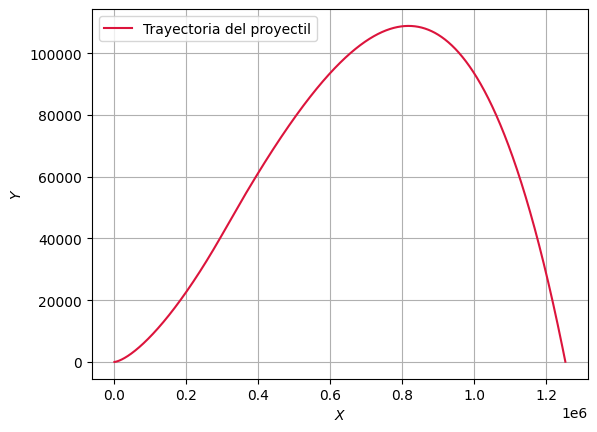

In [ ]:
t,x,y,vx,vy=Proyectil(Mc=1700000,Mb=1000000,r=1)
plt.plot(x,y,c='crimson',label='Trayectoria del proyectil')
plt.grid()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.legend()





## ***$Raices$***

Definimos una función que usara todas las anteriores, pero recibiera solo la cantidad de combustible, y entregara el último valor de X, que sería la distancia total recorrida. Usando ```scipy.optimize.newton```,  con una función que restaba la función ```distancia(Mc) ``` y la distancia deseada, para así encontrar el combustible necesario para tomar esa trayectoria.




In [ ]:

def distancia (Mc):  #Esta función es solo la distancia en x en función del combustible
  """
  Usa todas las funciones anteriores para encontrar una distancia únicamente en función de la cantidad de combustible

  Recibe
  Mc: Combustible (Kg)

  Entrega
  d: distancia recorrida
  """
  def ay_etapa2(t,y,vy1):
    return ((-1/2)*Cd*A*rho*vy1**2 - Mb*g)/Mb  #Ecuaciones de movimiento etapa 3
  def ax_etapa2(t,x0,vx1):
    return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

  def ay_etapa3(t,y,vy1):
      return ((1/2)*Cd*A*rho*vy1**2 - Mb*g)/Mb  #Ecuaciones de movimiento etapa 3
  def ax_etapa3(t,x0,vx1):
    return ((1/Mb)*(-1/2)*Cd*A*rho*(vx1)**2)

  t1,x1,vx1,y1,vy1=etapa1(Mb,Mc)
  t02,x02,y02,vx02,vy02=t1[-1],x1[-1],y1[-1],vx1[-1],vy1[-1]

  t2,x2,y2,vx2,vy2=etapa_2(ax_etapa2,ay_etapa2,t02,x02,y02,vx02,vy02)
  t03,x03,y03,vx03,vy03=t2[-1],x2[-1],y2[-1],vx2[-1],vy2[-1]

  t3,x3,y3,vx3,vy3=etapa_3(ax_etapa3,ay_etapa3,t03,x03,y03,vx03,vy03)

  X=np.concatenate((x1,x2,x3), axis=0)
  d=X[-1]
  return d


In [ ]:
a=60000
Mb=10000
def interpol(Mc):
  """
  Resta la función de distancia y una distancia 'a' dada, para encontrar las raíces usando newton
  """
  return distancia(Mc)-a

newton(interpol,Mb,tol=Mb/10)

np.float64(6866.5546350552795)

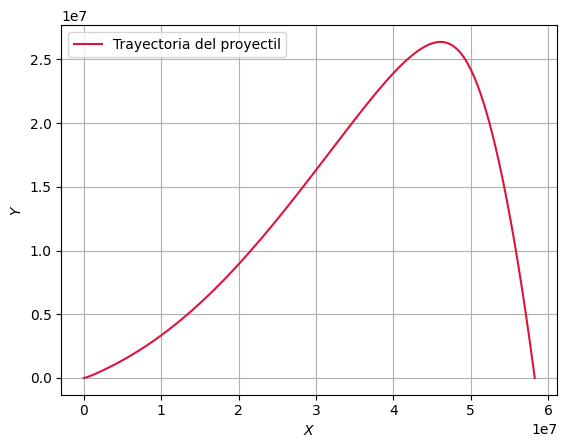

In [ ]:
t,x,y,vx,vy=Proyectil(Mc=1000000000,Mb=10000000,r=1)
plt.plot(x,y,c='crimson',label='Trayectoria del proyectil')
plt.grid()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.legend()

## ***$Funcion$ $Final$***

In [ ]:
def Cohete(Coord0, Coordf,Mb,r,theta=np.pi/6,h=0.01):

  d= round(geodesic(Coord0, Coordf).meters,2) #distancia geodésica


  G=6.674e-11     #Constante gravitacional
  Mt=5.972e24     #Masa de la Tierra
  Rt=6371         #Radio promedio de la Tierra
  ve=4500    #Velocidad de expulsión
  rho=1.225       # densidad del aire (15°c estandar)
  g=9.81        #un valor estandar de gravedad (Es solo un valor inicial estandarizado, inmediatamente despegue, variará)
  Cd=0.48         #Coeficiente de arrastre de una esfera rugosa
  A=np.pi*r**2
  Mb=Mb

  def interpol(Mc): #funcion minimizadora
    return distancia(Mc)-d

  mc=newton(interpol,Mb,tol=10) #Una tolerancia razonable, considerando los valores tan grandes con los que trabaja
  t,x,y,vx,vy=Proyectil(Mc=mc,Mb=Mb,r=r,theta=theta,h=h)
  return t,x,y,vx,vy,mc

In [ ]:
t,x,y,vx,vy,mc=Cohete((20,-75.5 ),(8,-74.07),Mb=10000,r=1)

In [ ]:
mc

np.float64(3068290.6211024188)

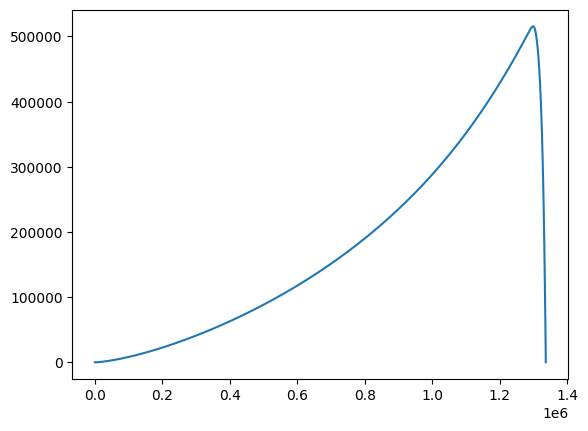

In [ ]:
plt.plot(x,y)

In [ ]:
x[-1] #Y como podemos observar...

np.float64(1336633.5994594737)

In [ ]:
a= geodesic((20,-75.5 ),(8,-74.07)).meters
a #La coincidencia es bastante precisa, es decir, alcanzamos nuestro objetivo!!

1336633.596179957

## ***$Análisis$ $del$ $Alcance$***

Note que nuestra función final, tiene una dependencia de $M_b$ para acercanos a la aproximación $M_c$, de modo que la convergencia y el hallazgo de raices siempre requiere valores razonables asociados al alcance máximo, la masa total, etc.

Por lo cual, al ingresar valores arbitarios aproximativos, la convergencia suele fallar, por lo cual, es vital poder tener valores aproximativos de nuestros alcances, para proporcionar valores mas cercanos, de este modo, se presenta la función "Alcance Máximo", que, dadas unas condiciones iniciales, presenta el alcance máximo del proyetil, y el radio de coordenadas viables para las condiciones.
De este modo, cualquier coordenada al interior del radio será totalmente factible con los valores proporcionados.


In [ ]:
#Descargas necesarias para la grafiación

!pip install cartopy
!pip install geographiclib
!pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 119.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


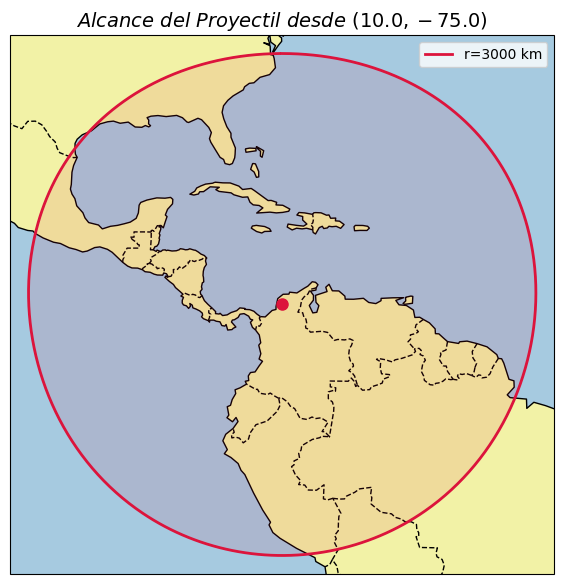

In [ ]:
#Tengamos una visualización del alcance màximo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from geographiclib.geodesic import Geodesic
from shapely.geometry import Polygon
from cartopy.mpl.path import shapely_to_path
from matplotlib.patches import PathPatch
import matplotlib.gridspec as gridspec

#Datos iniciales
centro = (10.0, -75.0)     # Latitud, Longitud
radio_km = 3000            # Radio del círculo
num_puntos = 720           # puntos (suavdiad del circulo)

#Calcula el circulo
geod = Geodesic.WGS84
lats = []
lons = []

#Caluculo de la circunferencia
for azimut in np.linspace(0, 360, num_puntos, endpoint=False):
    destino = geod.Direct(centro[0], centro[1], azimut, radio_km * 1000)
    lat, lon = destino['lat2'], destino['lon2']

    # Corrección de las longitudes fuera del rango -180 a 180
    if lon < -180:
        lon += 360
    elif lon > 180:
        lon -= 360

    lats.append(lat)
    lons.append(lon)

# Realiza la figura con los puntos
polygon = Polygon(zip(lons, lats))

#Crea el mapamundi
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

#Edición de color
ax.add_feature(cfeature.LAND, facecolor='#f2f2a6')     # Amarillo claro
ax.add_feature(cfeature.OCEAN, facecolor='#a6cae0')    # Azul claro
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Colorea el circulo interno
circle_patch = PathPatch(
    shapely_to_path(polygon),
    facecolor='crimson',
    edgecolor='crimson',
    alpha=0.1,
    transform=ccrs.PlateCarree(),
    zorder=3
)
ax.add_patch(circle_patch)

# Dibujar borde del círculo
ax.plot(lons, lats, color='crimson', linewidth=2, transform=ccrs.Geodetic(), label=f'r={radio_km} km')

# Punto central
ax.plot(centro[1], centro[0], 'o', color='crimson', markersize=8, transform=ccrs.PlateCarree())

# Ajuste automático del mapa
lat_min = min(lats) - 2
lat_max = max(lats) + 2
lon_min = min(lons) - 2
lon_max = max(lons) + 2
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Título y leyenda
plt.title(f'$Alcance$ $del$ $Proyectil$ $desde$ $({centro[0]}, {centro[1]})$', fontsize=14)
plt.legend()
plt.show()

In [ ]:
# Perfecto! Ya solo queda funcionalizarlo
def Alcance(Mb,Mc,r,Coord0):
  '''
  Provee el rango de alcance posible para el proyectil con los datos proporcionados.
  Entradas:
    Mb: Masa del proyectil per se (sin combustible) (float)
    Mc: Masa del combustible (float)
    r: radio en metros (float)
    Coord0: coordeandas de salida (dupla)
  Salidas:
  radio de alcance de posiblidades del proyectil
  '''
  t,x,y,vx,vy=Proyectil(Mc,Mb,r)
  distancia=float(x[-1]*1e-3)           #Todo es análogo a la graficación
  centro = Coord0
  radio_km = distancia
  num_puntos = 720

  #Calcula el circulo
  geod = Geodesic.WGS84
  lats = []
  lons = []

  #Caluculo de la circunferencia
  for azimut in np.linspace(0, 360, num_puntos, endpoint=False):
      destino = geod.Direct(centro[0], centro[1], azimut, radio_km * 1000)
      lat, lon = destino['lat2'], destino['lon2']

      # Corrección de las longitudes fuera del rango -180 a 180
      if lon < -180:
          lon += 360
      elif lon > 180:
          lon -= 360

      lats.append(lat)
      lons.append(lon)

  # Realiza la figura con los puntos
  polygon = Polygon(zip(lons, lats))


  fig = plt.figure(figsize=(12, 6))
  gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])

  # Subplot 1: Mapa geográfico (más grande)
  ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
  ax1.add_feature(cfeature.LAND, facecolor='#f2f2a6')
  ax1.add_feature(cfeature.OCEAN, facecolor='#a6cae0')
  ax1.add_feature(cfeature.COASTLINE)
  ax1.add_feature(cfeature.BORDERS, linestyle='--')

  circle_patch = PathPatch(
      shapely_to_path(polygon),
      facecolor='crimson',
      edgecolor='crimson',
      alpha=0.1,
      transform=ccrs.PlateCarree(),
      zorder=3
  )
  ax1.add_patch(circle_patch)
  ax1.plot(lons, lats, color='crimson', linewidth=2, transform=ccrs.Geodetic(), label=f'r={round(radio_km, 2)} km')
  ax1.plot(centro[1], centro[0], 'o', color='crimson', markersize=8, transform=ccrs.PlateCarree())
  ax1.set_extent([min(lons)-2, max(lons)+2, min(lats)-2, max(lats)+2], crs=ccrs.PlateCarree())
  ax1.set_title(f'Alcance del Proyectil desde ({centro[0]}, {centro[1]})')
  ax1.legend()

  #segunda grafica
  ax2 = fig.add_subplot(gs[1])
  ax2.plot(x*1e-3, y*1e-3, c='crimson', label='Trayectoria del proyectil')
  ax2.grid()
  ax2.set_xlabel('$X$ (Km)')
  ax2.set_ylabel('$Y$ (Km)')
  ax2.set_title('Trayectoria del proyectil')
  ax2.legend()

  plt.tight_layout()
  plt.show()

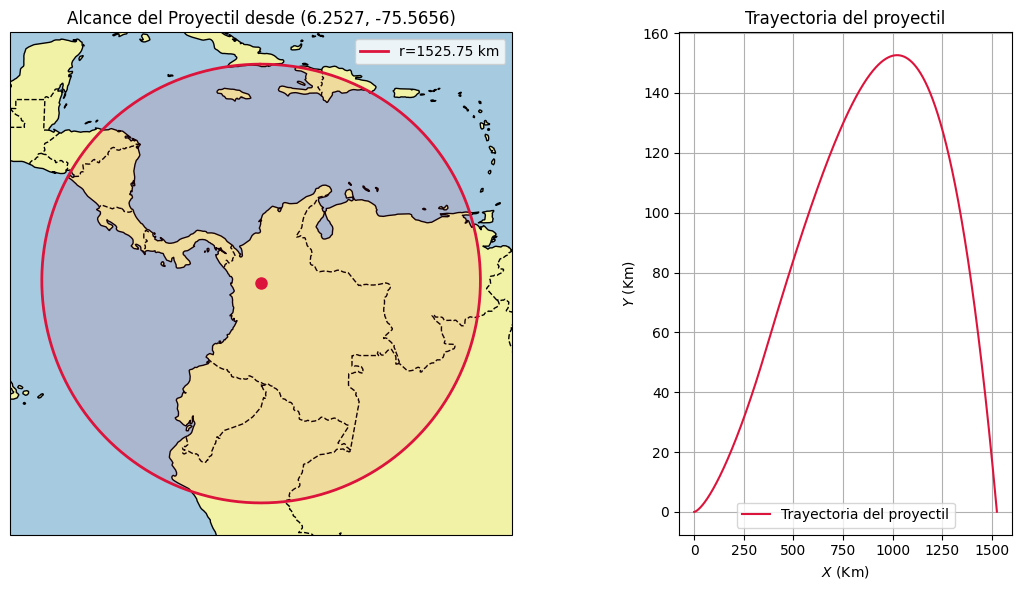

In [ ]:
Alcance(1000000,2000000,1,(6.2527,-75.5656))# Y voilá! Con estos datos listos

Aclance aproximado Calculado 919.07 Km
Alcance REAL 981.83 Km


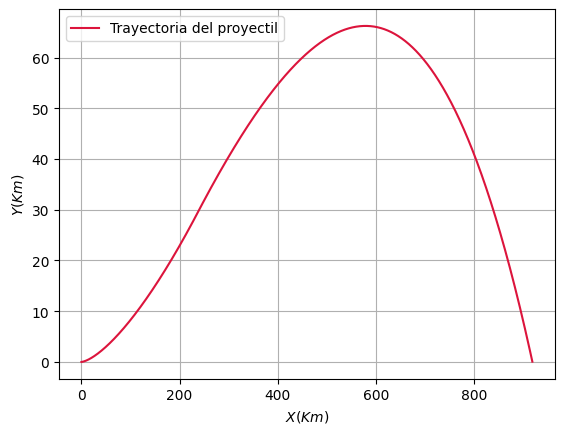

In [ ]:
#Perfecto! Esto implica que con esos valores de masa Mb, tenemos ese radio de posiblidades!
#Vemos que costarica esta en el radar...! Asi que probemos entonces.
t,x,y,vx,vy,mc=Cohete((6.2527,-75.5656),(9.7489, -83.7534),Mb=1000000,r=1)
plt.plot(x*1e-3,y*1e-3,c='crimson',label='Trayectoria del proyectil')
plt.grid()
plt.xlabel('$X(Km)$')
plt.ylabel('$Y(Km)$')
plt.legend()
print(f'Aclance aproximado Calculado {round(x[-1]*1e-3,2)} Km')
print(f'Alcance REAL {round(geodesic((6.2527,-75.5656),(9.7489, -83.7534)).kilometers,2)} Km')

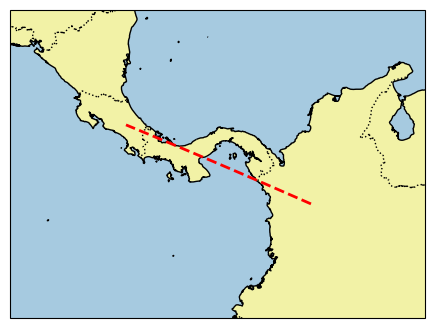

In [ ]:
#Eureka! Finalmente, solo queda una visualización
from matplotlib.animation import FuncAnimation
from IPython.display import HTML #Imports funcionales
C0,Cf=(6.2527,-75.5656),(9.7489, -83.7534) #Coordenadas iniciales y finales

geod = Geodesic.WGS84
num_points = 100
line = geod.InverseLine(C0[0], C0[1], Cf[0], Cf[1]) #Linea (una suerte de interpolación)

lons, lats = [], []
for i in range(num_points + 1):
    s = line.s13 * i / num_points
    pos = line.Position(s)
    lats.append(pos['lat2'])
    lons.append(pos['lon2'])

fig = plt.figure(figsize=(10, 4)) #Crea la figura
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='#f2f2a6') #Esto solo es la parte estética del mapa (análoga a la anterior)
ax.add_feature(cfeature.OCEAN, facecolor='#a6cae0')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-120, -30, -60, 35], crs=ccrs.PlateCarree())

margin = 5
lat_min = min(C0[0], Cf[0]) - margin
lat_max = max(C0[0], Cf[0]) + margin
lon_min = min(C0[1], Cf[1]) - margin #Esto escala el mapa. De modo que dos coordeandas arbitrarias siempre SEAN visualiuzables
lon_max = max(C0[1], Cf[1]) + margin
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

line_plot, = ax.plot([], [], color='red', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())

def init():
    line_plot.set_data([], [])
    return line_plot,

def update(frame):
    line_plot.set_data(lons[:frame], lats[:frame])
    return line_plot,                              #Y estas dos funciones estan asociadas a la animación de la línea

anim = FuncAnimation(fig, update, frames=len(lons), init_func=init,
                    blit=True, interval=30, repeat=False) #El intervalo es la velocidad

HTML(anim.to_jshtml())


## ***$Referencias$***
[1] NASA Glenn Research Center. (s.f.). Drag of a sphere. NASA Glenn Research Center – Beginner’s Guide to Aeronautics. https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/drag-of-a-sphere/


[2] Franco García, Á. (s.f.). Movimiento vertical de un cohete. Universidad del País Vasco. Extraído de http://www.sc.ehu.es/sbweb/fisica/dinamica/cohete3/cohete3.html


[3] Met Office (SciTools). (n.d.). Cartopy: a cartographic Python library with a Matplotlib interface. Extraído de https://scitools.org.uk/cartopy/docs/latest/